## plot numerical data

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
current_dir = os.getcwd()  # 現在の作業ディレクトリを取得
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
import src.read as read
import src.utils as util

In [52]:
file_names = []
directory = "memory_usage/"
pattern = "maxmemory*.dat"

result = read.get_filenames_list_exp(directory, pattern)
file_names = result[0]
n_files = result[1]

print(file_names)

['maxmemory1.dat', 'maxmemory2.dat', 'maxmemory3.dat', 'maxmemory4.dat']


In [53]:
array = read.read_files(directory, file_names)
print(type(array))
print(f"2次元配列の形状: {array.shape}")

<class 'numpy.ndarray'>
2次元配列の形状: (4, 7)


In [54]:
mean_HROM = []
n_means = array.shape[0]
n_data = array.shape[1]
tr = range(30, n_data)
mean_HROM = util.get_mean(array, n_means, target_dim=0, custom_flag=True, target_range=tr)

print(mean_HROM)

[]


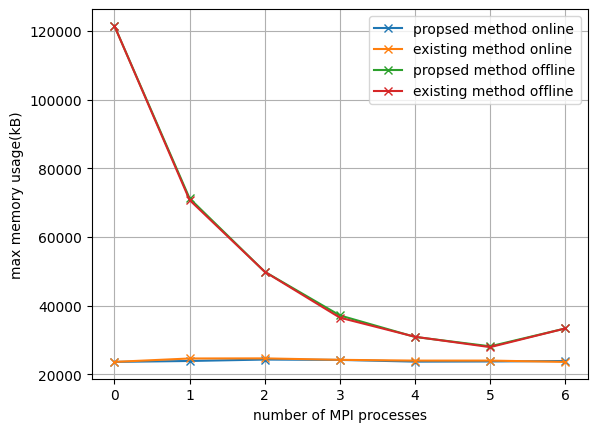

In [55]:
array = array.T
fig_3, ax_3 = plt.subplots()
data_names = ['propsed method online','existing method online','propsed method offline','existing method offline']

for i in range(1,(n_files+1),1):
    incr = 2**(i-1)
    data_names.append(f'err{incr}')

for i in range(0, n_files, 1):
    ax_3.plot(array[:,i], marker='x', label=data_names[i])

ax_3.set_xlabel('number of MPI processes')
ax_3.set_ylabel('max memory usage(kB)')
ax_3.legend(data_names)
ax_3.grid()
# ax_3.set_ylim(0.0, 0.001)
# ax_3.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

plt.show()

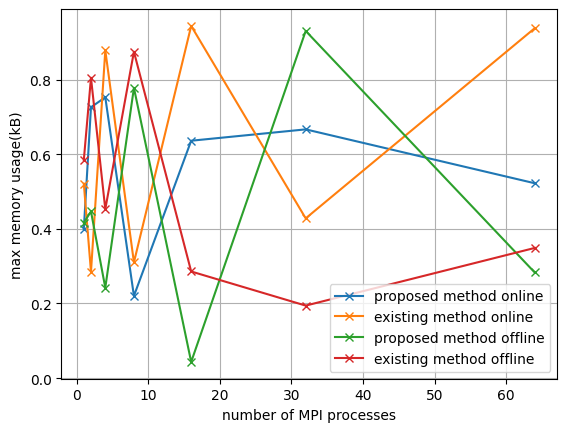

In [ ]:

# array の形状は [7, 4] と仮定

fig_3, ax_3 = plt.subplots()
data_names = ['proposed method online', 'existing method online', 'proposed method offline', 'existing method offline']

# 横軸の値を設定
x_ticks = [1, 2, 4, 8, 16, 32, 64]

# プロット
for i in range(0, array.shape[1], 1):
    ax_3.plot(x_ticks, array[:, i], marker='x', label=data_names[i])

ax_3.set_xlabel('number of MPI processes')
ax_3.set_ylabel('max memory usage(kB)')
ax_3.legend()
ax_3.grid()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

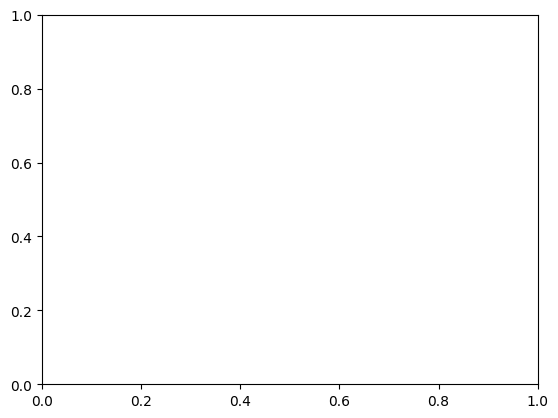

In [57]:
fig, ax = plt.subplots()
x = np.zeros(n_files)
for i in range(0,n_files,1):
    x[i] = 2**i

ax.plot(x, mean_HROM, marker='o')
ax.set_xlabel('number of subdomains')
ax.set_ylabel('error')
ax.grid()
ax_3.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
# ax.set_xscale('log')
# ax.set_xticks(mean_HROM)
# ax.set_xticklabels([2**i for i in range(0,len(mean_HROM))])
# ax.set_title('disp error')
plt.show()